In [164]:
import numpy as np
import sympy as sp
from numpy import linalg as li
np.set_printoptions(suppress=True)
#n=86, m=8, l=6, k=14, i=10, j=6
A = np.array([[86, 7, 2, 4, 8, -3],
             [5, -6, -2, -3, -3, 2],
             [2, -1, 14, -1, 2, -12],
             [12, 5, -1, -10, 2, -2],
             [-2, -4, 3, 1, 6, -2],
             [-1, -42, 8, 2, -2, 8]])
print('A=')
print(A)

A=
[[ 86   7   2   4   8  -3]
 [  5  -6  -2  -3  -3   2]
 [  2  -1  14  -1   2 -12]
 [ 12   5  -1 -10   2  -2]
 [ -2  -4   3   1   6  -2]
 [ -1 -42   8   2  -2   8]]


In [165]:
#Метод Фадєєва-Лаверьє
n = len(A)
b = [0]*(n+2)
K = [0]*(n+1)
b[n] = -1*np.trace(A)
b[n+1] = 1
K[n] = np.identity(n)
print(f'b[{n-1}] = {b[6]}, \nK[{n-1}] = \n{K[6]}')

b[5] = -98, 
K[5] = 
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [166]:
#Послідовно отримуємо значення коефіцієнтів
n = len(A)
for i in range(1, n):
    K[n-i] = np.dot(A, K[n-i+1]) + b[n-i+1]*np.identity(n)
    b[n-i] = (-1/(i+1))*np.trace(np.dot(A, K[n-i]))
b = b[1:n+2]
K = K[1:n+1]
b

[6215396.0, 119697.0, -253499.0, 1589.0, 986.0, -98, 1]

In [167]:
#Правильність виконаних розрахунків перевіримо за допомогою наступного співвідношення: AK0 + b0E = 0.
np.dot(A, K[0]) + b[0]*np.identity(n)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [168]:
#Будуємо характеристичне рівняння
indexes = {0: '\u00B0', 1: '', 2: '\u00B2', 3: '\u00B3', 4: '\u2074', 5: '\u2075',
           6: '\u2076', 7: '\u2077', 8: '\u2078', 9: '\u2079'}
print(' + '.join([f'({str(b[i])})' + 'λ{}'.format(indexes[i]) if i != 0 else str(b[i]) for i in range(n)]) + ' + λ\u2076')

6215396.0 + (119697.0)λ + (-253499.0)λ² + (1589.0)λ³ + (986.0)λ⁴ + (-98)λ⁵ + λ⁶


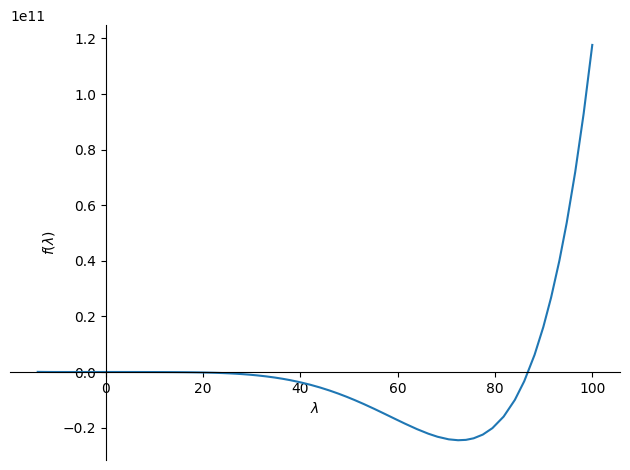

In [171]:
l = sp.symbols('λ')
eq = sp.Function('eq')(l)
# eq = 4118185.0 - 23945.0*l - 190431.0*(l**2) + 347.0*(l**3) + 954.0*(l**4) - 88*(l**5) + l**6
eq = 6215396 + (119697*l) -253499.0*l**2 + 1589.0*l**3 + (986.0*l**4) -98*(l**5) + l**6
p = sp.plot(eq, (l, -14, 100), show=False, title='')
p.show()

In [172]:
list(np.roots(list(reversed(b))))

[(86.81585014001695+0j),
 (10.516914222778054+11.982657375933176j),
 (10.516914222778054-11.982657375933176j),
 (5.458949961965748+0j),
 (-10.298946744934758+0j),
 (-5.009681802604025+0j)]

In [ ]:
A1 = -1*K[0]/b[0]
A1

In [ ]:
g = abs(np.dot(A, A1))
print(g)

In [ ]:
#Метод Крилова
n = len(A)
x = [0 for i in range(0, n + 1)]
x[0] = np.linspace(0, 1, len(A)) #Розбиття відрізка (0, 1) на len(A) частин
# x = [1, 0, 0, 0, 0, 0]
for i in range(1, n+1):
    x[i] = np.dot(A, x[i-1])

In [ ]:
#Знаходимо коефіцієнти
K = np.array([x[i] for i in reversed(range(0, n))]).reshape(n, n)
p = -x[n]
b = list(np.linalg.solve(K.T, p))
print(f'b= {b}')

In [ ]:
bb = list(b)[::-1]
bb.append(1)
bb = np.round(np.array(bb), 1)
bb[::-1]

In [ ]:
#Будуємо характеристичний поліном
indexes = {0: '\u00B0', 1: '', 2: '\u00B2', 3: '\u00B3', 4: '\u2074', 5: '\u2075',
           6: '\u2076', 7: '\u2077', 8: '\u2078', 9: '\u2079'}
print(' + '.join([f'({str(bb[i])})' + 'λ{}'.format(indexes[i]) if i != 0 else str(bb[i]) for i in range(n)]) + ' + λ\u2076')

In [173]:
#Знаходимо значення коренів
li.eig(A)

(array([ 86.81585014 +0.j        ,  10.51691422+11.98265738j,
         10.51691422-11.98265738j, -10.29894674 +0.j        ,
         -5.0096818  +0.j        ,   5.45894996 +0.j        ]),
 array([[-0.98972899+0.j        , -0.01568378+0.01818007j,
         -0.01568378-0.01818007j,  0.04359905+0.j        ,
         -0.01840654+0.j        , -0.05283482+0.j        ],
        [-0.0487159 +0.j        ,  0.01371313+0.09182403j,
          0.01371313-0.09182403j, -0.36781592+0.j        ,
          0.32932846+0.j        , -0.16772057+0.j        ],
        [-0.02938796+0.j        , -0.20829491-0.62547691j,
         -0.20829491+0.62547691j, -0.34974202+0.j        ,
          0.49841481+0.j        , -0.63086979+0.j        ],
        [-0.1250571 +0.j        ,  0.06743145+0.01193206j,
          0.06743145-0.01193206j, -0.58027577+0.j        ,
         -0.07736686+0.j        ,  0.07618388+0.j        ],
        [ 0.02348017+0.j        , -0.14217833-0.12497044j,
         -0.14217833+0.12497044j, -0.0625

In [ ]:
#QR
n = 200
A1 = np.zeros((n, 6, 6), dtype=np.float64)
A1[0] = A
res = 0
Q = np.zeros((n, 6, 6), dtype=np.float64)
R = np.zeros((n, 6, 6), dtype=np.float64)
for i in range(1, n):
    Q, R = li.qr(A1[i-1])
    A1[i] = np.dot(R, np.transpose(Q))
    flag = True
    for j in range(4):
        if A1[i][j+1][j] >= 0.01:
            flag = False
    # if flag:
    res = i
    print(A1[i], res)
print(res)

In [ ]:
# def QR_eigvals(A, tol=1e-12, maxiter=1000):
#     A_old = np.copy(A)
#     A_new = np.copy(A)
#     diff = np.inf
#     i = 0
#     while (diff > tol) and (i < maxiter):
#         A_old[:, :] = A_new
#         Q, R = li.qr(A_old)
#
#         A_new[:, :] = R @ Q
#
#         diff = np.abs(A_new - A_old).max()
#         i += 1
#         # print(f'i={i}, A1 = {A_new}')
#     eigvals = np.diag(A_new)
#
#     return eigvals
# print(sorted(QR_eigvals(A)))

In [ ]:
# A1 = A.copy()
# q = [[]]*(n)
# r = [[]]*(n)
# for i in range(0, n**2 + 1):
#     q[i], r[i] = li.qr(A1[i-1])
# np.diag(A1).reshape(n, 1)

In [ ]:
# A1 = np.zeros((n, 6, 6))
# A1[0] = A
# # q, r = np.zeros((n, 6, 6))
# for i in range(0, (n**2) + 1):
#     q, r = li.qr(A1)
#     A1 = r@(q)
# print(A1)